# **Kaggle study**
Predict survival on the Titanic and get familiar with ML basics.

# 1. Load data

In [1]:
import pandas as pd

train = pd.read_csv("C:/Users/user/Github/[Kaggle] Titanic/train.csv")
test = pd.read_csv("C:/Users/user/Github/[Kaggle] Titanic/test.csv")

# 2. EDA(Exploratory data analysis)

**Data Dictionary**
- Survival : 0 = No, 1 = Yes  
- pclass : Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)  
- sibsp	: # of siblings / spouses aboard the Titanic  
- parch	: # of parents / children aboard the Titanic  
- embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
# 데이터 파악하기
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# train데이터에는 생존여부가 나와있음 -> 지도학습
train.shape
test.shape

# 유실된 데이터가 있음을 파악 -> fearture engineering에서 다뤄야할 것
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set() # setting seaborn defalut for plots

# 그래프에서 한글 표현을 위해 폰트 설치
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


**Bar chart for categorical features**
- Pclass
- Sex
- SibSp
- Parch
- Embarked
- Cabin

In [7]:
# 함수로 정의하여 그래프 그리기
def bar_chart(feature) :
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

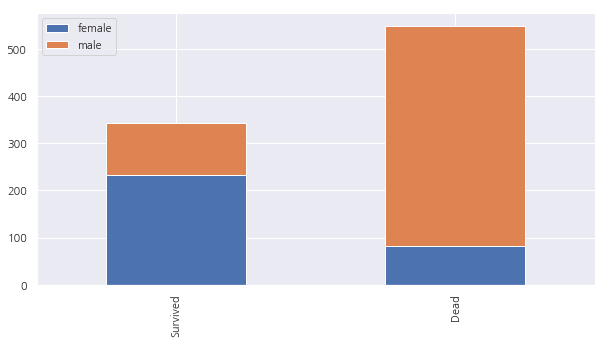

In [8]:
bar_chart('Sex')

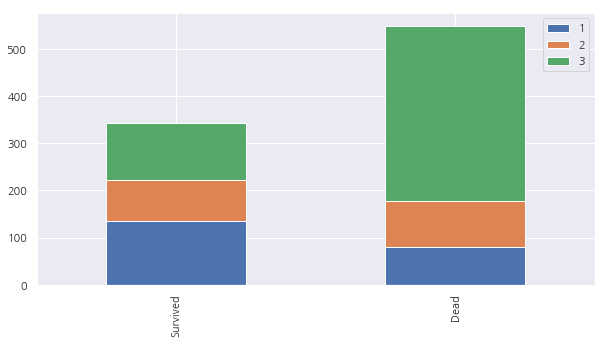

In [9]:
bar_chart('Pclass')

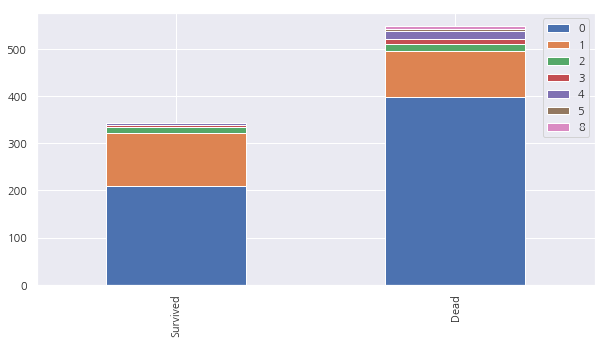

In [10]:
bar_chart('SibSp')

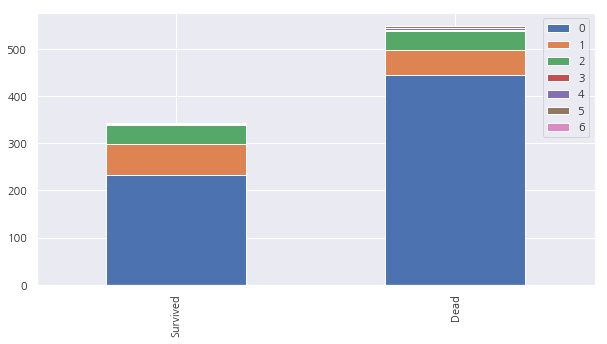

In [11]:
bar_chart('Parch')

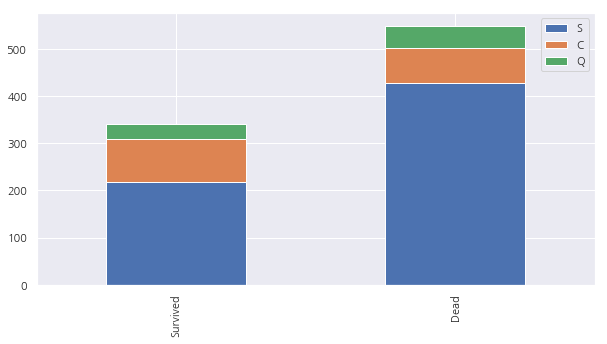

In [12]:
bar_chart('Embarked')

# 3. Feature engineering
방 위치, 클래스 주요 팩터

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.1 Name

In [14]:
# 데이터 합치기 및 타이틀 데이터 추출
# Name에서 대문자로 시작해서 이 후에는 소문자가 나열되며 . 을 만나면 탐색을 멈춰 string을 추출한다.
train_test_data = [train,test]

for dataset in train_test_data : 
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [15]:
train['Title'].head
train.shape
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Jonkheer      1
Countess      1
Lady          1
Capt          1
Don           1
Ms            1
Sir           1
Name: Title, dtype: int64

In [16]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

**Title map**  
Mr : 0  
Miss : 1  
Mrs : 2  
Others : 3  

In [17]:
# 타이틀 값에 수치값 매핑(데이터프레임형태의 두개의 데이터셋을 리스트형으로 묶은 경우 함수 사용하여 적요)
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


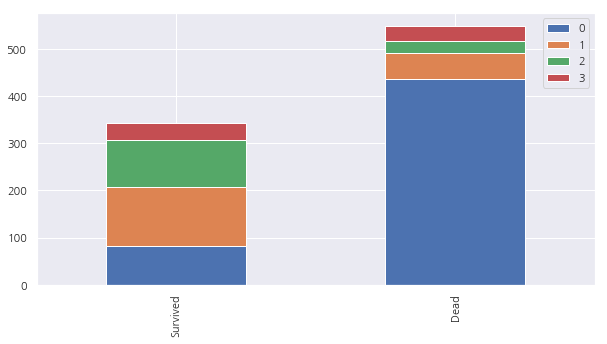

In [19]:
# 앞서 정의한 train 데이터에 대한 그래프 삽입 함수 적용
bar_chart('Title')

In [20]:
# 불필요한 피쳐 제거
# drop(행의색인 또는 열의 이름, axis = 0 or 1) axis가 0일때 행 / 1일때 열
train.drop('Name', axis =1, inplace = True)
test.drop('Name', axis =1 , inplace = True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


## 3.2 Sex
male : 0   
female : 1

In [23]:
sex_mapping = {"male" : 0, "female" :1}

for dataset in train_test_data :
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [24]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


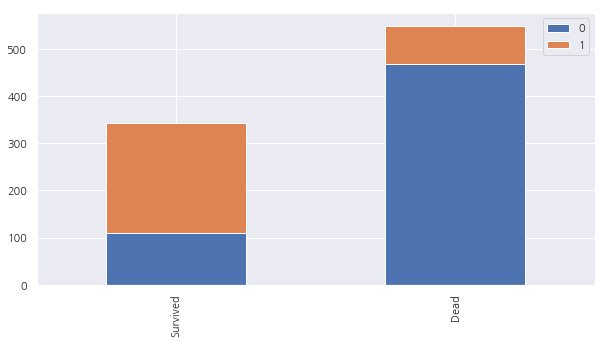

In [25]:
bar_chart('Sex')

## 3.3 Age
### 3.3.1 some age is missing

In [26]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2


In [27]:
train['Age'].isnull().sum()

177

In [28]:
# 전체 나이 합을 평균으로 나눴을 경우
age = train['Age'].sum() / len(train.index)

In [29]:
# 각 타이틀의 합을 평균으로 나눴을 경우
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


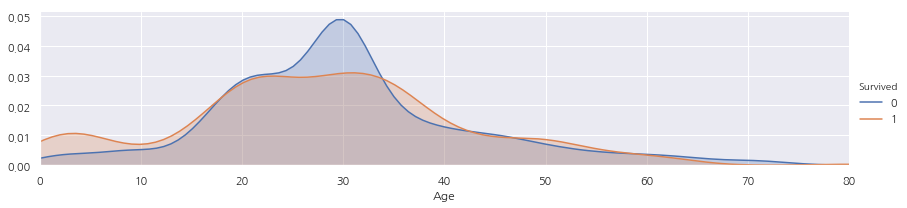

In [30]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()


plt.show()

### 3.3.2 Binning
Binning/Converting Numerical Age to Categorical Variable

feature vector map:
child: 0
young: 1
adult: 2
mid-age: 3
senior: 4

In [31]:
for dataset in train_test_data :
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


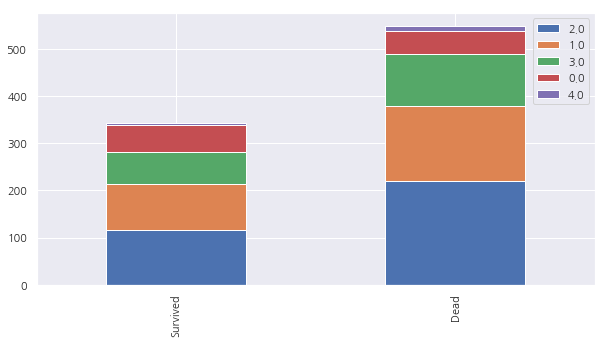

In [33]:
bar_chart('Age')

## 3.4 Embarked

### 3.4.1 filling missing values

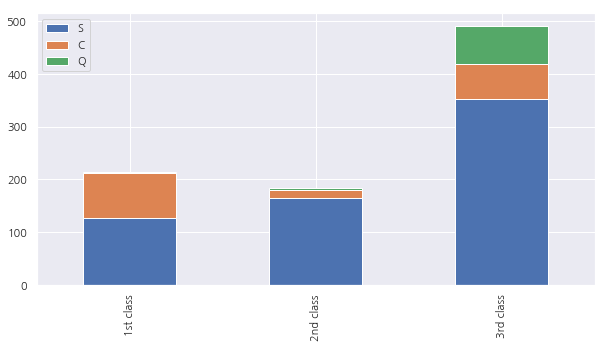

In [34]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked = True, figsize=(10,5))

In [35]:
for dataset in train_test_data : 
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [36]:
# 출항지의 50%이상이 S이므로 결측치에 S를 삽입해도 무방하다
embarked_mapping = {"S" : 0, "C" : 1, "Q" : 2}
for dataset in train_test_data :
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## 3.5 Fare

In [37]:
# 운임료 결측값에 각 클래스의 중앙값을 삽입
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)

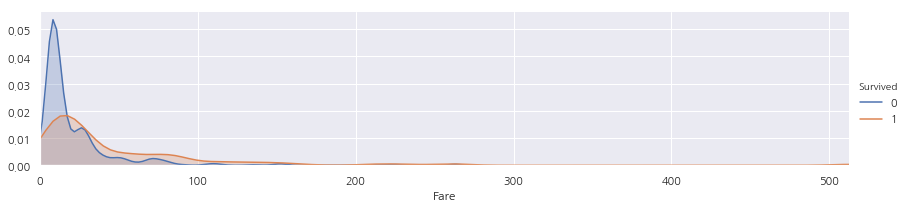

In [38]:
# 생존여부에 따른 운임료 그래프
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()

plt.show()

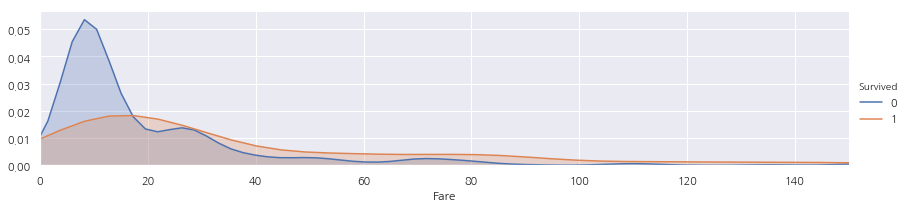

In [39]:
# 운임료 상한 조정
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, 150))
facet.add_legend()

plt.show()

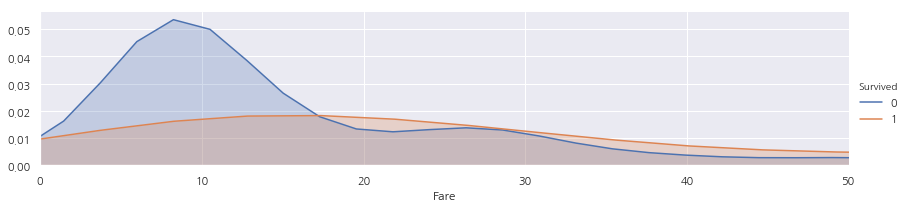

In [40]:
# 운임료 상한 조정
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, 50))
facet.add_legend()

plt.show()

In [41]:
# 운임료 구간별 라벨링
for dataset in train_test_data :
    dataset.loc[dataset["Fare"] < 17 , "Fare" ] = 0,
    dataset.loc[(dataset["Fare"] >= 17 ) & (dataset["Fare"] <  30), "Fare" ] = 1,
    dataset.loc[(dataset["Fare"] >= 30 ) & (dataset["Fare"] < 100), "Fare" ] = 2,
    dataset.loc[dataset["Fare"] >= 100, "Fare" ] = 1

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


## 3.6 Cabin

In [43]:
train.Cabin.value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
F2                 3
F33                3
E101               3
C22 C26            3
D                  3
C124               2
B28                2
E67                2
C65                2
C52                2
F4                 2
D20                2
B20                2
E33                2
C78                2
B57 B59 B63 B66    2
C68                2
E25                2
C126               2
E24                2
F G73              2
B58 B60            2
E8                 2
C125               2
C92                2
B77                2
D33                2
                  ..
C7                 1
A16                1
D30                1
C87                1
C82                1
E36                1
B39                1
C86                1
E58                1
C30                1
E68                1
C46                1
E17                1
F38                1
B19                1
D19                1
D21          

In [44]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [45]:
# 캐빈 데이터에서 첫번째 글짜만 추출
for dataset in train_test_data :
    dataset["Cabin"] = dataset["Cabin"].str[:1]
    
train["Cabin"].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

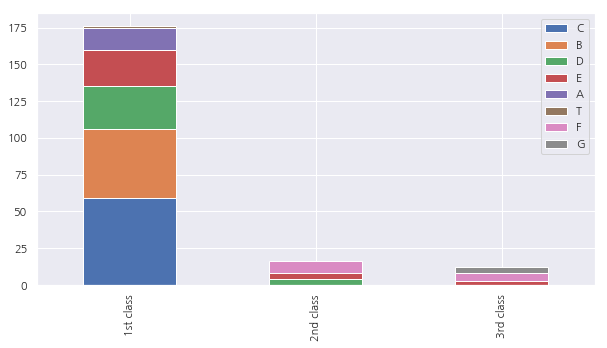

In [46]:
# 클래스별 캐빈 분포 누적막대 그래프

Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked = True, figsize=(10,5))



In [47]:
# Feature scaling  
# 기본적으로 머신러닝 분류기는 숫자를 사용하고 주로 유클리디언 디스턴스로 계산
# 즉, 숫자의 거리가 비슷하지 않으면 예를 들어 큰 거리에 있는 것을 좀 더 중요하게 생각할 수도 있다.
cabin_mapping  = {"A" : 0 , "B" : 0.4 , "C" : 0.8 , "D" : 1.2, "E" : 1.6, "F" : 2, "G" : 2.4, "T" : 2.8 }
for dataset in train_test_data :
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [48]:
# 캐빈의 결측치를 중앙값으로 삽입
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

## 3.7 FamilySize

In [49]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

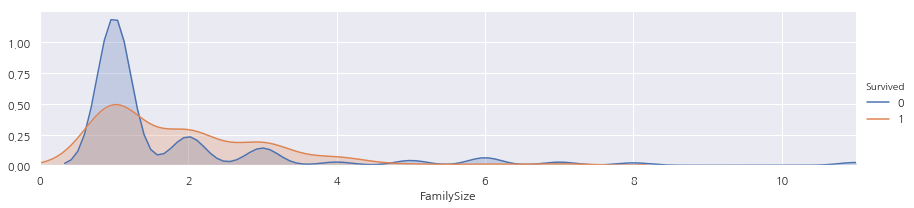

In [50]:
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [51]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

for dataset in train_test_data : 
    dataset["FamilySize"] = dataset['FamilySize'].map(family_mapping)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [53]:
# 불필요한 데이터 삭제
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)


In [54]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape



((891, 8), (891,))

In [55]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


# 4. Modeling

In [56]:
# Importing classifier modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


## 4.1 Cross Validation (K-fold)

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 4.1.1 KNN

In [59]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.79775281 0.82022472 0.83146067 0.84269663 0.83146067
 0.82022472 0.78651685 0.83146067 0.83146067]


In [60]:
# KNN Score
round(np.mean(score)*100, 2)

82.04

### 4.1.2 Decisin Tree

In [61]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs= 1, scoring = scoring)
print(score)

[0.75555556 0.79775281 0.76404494 0.78651685 0.87640449 0.78651685
 0.80898876 0.82022472 0.71910112 0.79775281]


In [62]:
# decision tree Score
round(np.mean(score)*100,2)

79.13

### 4.1.3 RandomForest

In [63]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.80898876 0.78651685 0.79775281 0.85393258 0.79775281
 0.80898876 0.80898876 0.76404494 0.83146067]


### 4.1.4 Naive Bayes

In [64]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.86666667 0.73033708 0.75280899 0.74157303 0.69662921 0.80898876
 0.76404494 0.79775281 0.86516854 0.84269663]


### 4.1.5 SVM

In [65]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.83146067 0.85393258 0.83146067 0.86516854]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Testing

In [66]:
test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8
5,897,3,0,0.0,0.0,2.0,0,0,0.0
6,898,3,1,2.0,0.0,2.0,2,1,0.0
7,899,2,0,1.0,1.0,2.0,0,0,0.8
8,900,3,1,1.0,0.0,2.0,1,2,0.0
9,901,3,0,1.0,1.0,2.0,0,0,0.8


In [68]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [73]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : prediction
})

submission.to_csv("submission.csv", index=False)

In [76]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 출처
---
- 허민석님 https://www.youtube.com/watch?v=aqp_9HV58Ls